# Semester Project: Biodoversity Across the United States

### Loading Packages and Datasets

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.features import Rank2D

In [2]:
parks = pd.read_csv(r"C:\Users\datre\OneDrive\Documents\Graduate School\Winter '20\parks.csv")
species = pd.read_csv(r"C:\Users\datre\OneDrive\Documents\Graduate School\Winter '20\species.csv")

C:\Users\datre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
parks.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08


In [4]:
parks.shape

(56, 6)

In [5]:
species.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [6]:
species["Category"]

0                 Mammal
1                 Mammal
2                 Mammal
3                 Mammal
4                 Mammal
               ...      
119243    Vascular Plant
119244    Vascular Plant
119245    Vascular Plant
119246    Vascular Plant
119247    Vascular Plant
Name: Category, Length: 119248, dtype: object

In [7]:
species.shape

(119248, 14)

In [8]:
species = species[["Park Name", "Category", "Scientific Name", "Common Names", "Nativeness", "Abundance", "Conservation Status"]]
species = species.sample(10000)
species.head()

,Park Name,Category,Scientific Name,Common Names,Nativeness,Abundance,Conservation Status
47138,Great Smoky Mountains National Park,Vascular Plant,Ruellia humilis ssp. caroliniensis var. caroli...,None,NaN,NaN,NaN
93054,Redwood National Park,Fungi,Cyathus stercoraceus,None,NaN,NaN,NaN
68547,Katmai National Park and Preserve,Slug/Snail,Menetus cooperi,None,Unknown,Unknown,NaN
11246,Canyonlands National Park,Vascular Plant,Tripterocalyx micranthus,Small-Flower Sandpuffs,Native,Uncommon,NaN
119091,Zion National Park,Vascular Plant,Cheilanthes wootonii,Wooton's Lip-Fern,Native,Rare,NaN


In [9]:
species.shape

(10000, 7)

### Splitting Data Into Regions

#### East

In [10]:
east = parks[parks["State"].isin(["ME", "NH", "MA", "VT", "CT", "RI", "NY", "PA", "DE", "DC", "MD", "MS", "OH", "MI", "IN", "IL", "WI", "VA", "NC", "SC", "TN", "KY", "GA", "FL", "AL"])]
east

,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08
11,CONG,Congaree National Park,SC,26546,33.78,-80.78
13,CUVA,Cuyahoga Valley National Park,OH,32950,41.24,-81.55
16,DRTO,Dry Tortugas National Park,FL,64701,24.63,-82.87
17,EVER,Everglades National Park,FL,1508538,25.32,-80.93
30,ISRO,Isle Royale National Park,MI,571790,48.10,-88.55
37,MACA,Mammoth Cave National Park,KY,52830,37.18,-86.10
48,SHEN,Shenandoah National Park,VA,199045,38.53,-78.35


In [11]:
pke_name = ["Acadia National Park", "Biscayne National Park", "Congaree National Park", "Cuyahoga Valley National Park", "Dry Tortugas National Park", "Everglades National Park", "Isle Royale National Park", "Mammoth Cave National Park", "Shenandoah National Park"]
sp_east = species[species["Park Name"].isin(pke_name)]
sp_east

,Park Name,Category,Scientific Name,Common Names,Nativeness,Abundance,Conservation Status
75439,Mammoth Cave National Park,Vascular Plant,Arabis canadensis,"Sicklepod, Sicklepod Rockcress",Native,Unknown,NaN
7372,Biscayne National Park,Fish,Hypoplectrus guttavarius,"Golden Hamlet, Shy Hamlet",Unknown,Unknown,NaN
31626,Everglades National Park,Bird,Icterus galbula,"Baltimore Oriole, Northern Oriole",Native,Common,NaN
902,Acadia National Park,Vascular Plant,Lonicera villosa,Mountain Fly Honeysuckle,Native,Uncommon,NaN
65165,Isle Royale National Park,Invertebrate,Polyarthra major,None,Native,Unknown,NaN
...,...,...,...,...,...,...,...
7763,Biscayne National Park,Vascular Plant,Vigna luteola,"Dalrymple Vigna, Deer Pea, Hairypod Cowpea",Native,Rare,NaN
104566,Shenandoah National Park,Insect,Ephemerella dorothea,None,Unknown,Rare,NaN
7197,Biscayne National Park,Fish,Halichoeres cyanocephalus,Yellowcheek Wrasse,Unknown,Unknown,NaN
387,Acadia National Park,Bird,Picoides arcticus,"Arctic Three-Toed Woodpecker, Black-Backed Thr...",Native,Occasional,Under Review


In [12]:
sp_east["Location"] = 1
sp_east["US"] = "East"
sp_east.head()

C:\Users\datre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\datre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Park Name,Category,Scientific Name,Common Names,Nativeness,Abundance,Conservation Status,Location,US
75439,Mammoth Cave National Park,Vascular Plant,Arabis canadensis,"Sicklepod, Sicklepod Rockcress",Native,Unknown,NaN,1,East
7372,Biscayne National Park,Fish,Hypoplectrus guttavarius,"Golden Hamlet, Shy Hamlet",Unknown,Unknown,NaN,1,East
31626,Everglades National Park,Bird,Icterus galbula,"Baltimore Oriole, Northern Oriole",Native,Common,NaN,1,East
902,Acadia National Park,Vascular Plant,Lonicera villosa,Mountain Fly Honeysuckle,Native,Uncommon,NaN,1,East
65165,Isle Royale National Park,Invertebrate,Polyarthra major,None,Native,Unknown,NaN,1,East


#### Central

In [13]:
central = parks[parks["State"].isin(["MN", "IA", "MO", "AR", "LA", "TX", "OK", "KS", "NE", "SD", "ND"])]
central

,Park Code,Park Name,State,Acres,Latitude,Longitude
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
26,GUMO,Guadalupe Mountains National Park,TX,86416,31.92,-104.87
29,HOSP,Hot Springs National Park,AR,5550,34.51,-93.05
49,THRO,Theodore Roosevelt National Park,ND,70447,46.97,-103.45
50,VOYA,Voyageurs National Park,MN,218200,48.50,-92.88
51,WICA,Wind Cave National Park,SD,28295,43.57,-103.48


In [14]:
pkc_name = ["Badlands National Park", "Big Bend National Park", "Guadalupe Mountains National Park", "Hot Springs National Park", "Theodore Roosevelt National Park", "Voyageurs National Park", "Wind Cave National Park"]
sp_cent = species[species["Park Name"].isin(pkc_name)]
sp_cent

,Park Name,Category,Scientific Name,Common Names,Nativeness,Abundance,Conservation Status
108805,Wind Cave National Park,Vascular Plant,Erysimum cheiranthoides,"Treacle Wallflower, Wallflower Mustard, Wormse...",Not Native,Unknown,NaN
3009,Badlands National Park,Bird,Sitta carolinensis,White-Breasted Nuthatch,Native,Uncommon,NaN
107140,Voyageurs National Park,Vascular Plant,Sagittaria latifolia,Broadleaf Arrowhead,Native,Unknown,NaN
5403,Big Bend National Park,Vascular Plant,Gilia stewartii,Stewart's Gilia,Native,Unknown,NaN
6050,Big Bend National Park,Vascular Plant,Heteropogon contortus,"Tangelhead, Tanglehead",Native,Unknown,NaN
...,...,...,...,...,...,...,...
107459,Voyageurs National Park,Vascular Plant,Symphoricarpos albus,Common Snowberry,Native,Unknown,NaN
3662,Badlands National Park,Vascular Plant,Cystopteris fragilis,"Brittle Bladder Fern, Brittle Bladderfern, Fra...",Native,Rare,NaN
107768,Voyageurs National Park,Vascular Plant,Carex houghtoniana,Houghton's Sedge,Native,Unknown,NaN
55694,Guadalupe Mountains National Park,Nonvascular Plant,Spirogyra,None,NaN,NaN,NaN


In [15]:
sp_cent["Location"] = 2
sp_cent["US"] = "Central"
sp_cent.head()

C:\Users\datre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\datre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Park Name,Category,Scientific Name,Common Names,Nativeness,Abundance,Conservation Status,Location,US
108805,Wind Cave National Park,Vascular Plant,Erysimum cheiranthoides,"Treacle Wallflower, Wallflower Mustard, Wormse...",Not Native,Unknown,NaN,2,Central
3009,Badlands National Park,Bird,Sitta carolinensis,White-Breasted Nuthatch,Native,Uncommon,NaN,2,Central
107140,Voyageurs National Park,Vascular Plant,Sagittaria latifolia,Broadleaf Arrowhead,Native,Unknown,NaN,2,Central
5403,Big Bend National Park,Vascular Plant,Gilia stewartii,Stewart's Gilia,Native,Unknown,NaN,2,Central
6050,Big Bend National Park,Vascular Plant,Heteropogon contortus,"Tangelhead, Tanglehead",Native,Unknown,NaN,2,Central


#### West

In [16]:
west = parks[parks["State"].isin(["MT", "WY", "CO", "NM", "AZ", "UT", "ID", "NV", "CA", "OR", "WA"])]
west

,Park Code,Park Name,State,Acres,Latitude,Longitude
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
5,BLCA,Black Canyon of the Gunnison National Park,CO,32950,38.57,-107.72
6,BRCA,Bryce Canyon National Park,UT,35835,37.57,-112.18
7,CANY,Canyonlands National Park,UT,337598,38.20,-109.93
8,CARE,Capitol Reef National Park,UT,241904,38.20,-111.17
9,CAVE,Carlsbad Caverns National Park,NM,46766,32.17,-104.44
10,CHIS,Channel Islands National Park,CA,249561,34.01,-119.42
12,CRLA,Crater Lake National Park,OR,183224,42.94,-122.10
19,GLAC,Glacier National Park,MT,1013572,48.80,-114.00
21,GRBA,Great Basin National Park,NV,77180,38.98,-114.30


In [17]:
pkw_name = ["Zion National Park", "Yosemite National Park", "Sequoia and Kings Canyon National Parks", "Saguaro National Park", "Rocky Mountain National Park", "Redwood National Park", "Petrified Forest National Park", "Olympic National Park", "North Cascades National Park", "Mount Rainier National Park", "Mesa Verde National Park", "Lassen Volcanic National Park", "Joshua Tree National Park", "Grand Teton National Park", "Great Sand Dunes National Park and Preserve", "Grand Canyon National Park", "Great Basin National Park", "Glacier National Park", "Crater Lake National Park", "Channel Islands National Park", "Carlsbad Caverns National Park", "Capitol Reef National Park", "Canyonlands National Park", "Bryce Canyon National Park", "Black Canyon of the Gunnison National Park", "Arches National Park"]
sp_west = species[species["Park Name"].isin(pkw_name)]
sp_west

,Park Name,Category,Scientific Name,Common Names,Nativeness,Abundance,Conservation Status
93054,Redwood National Park,Fungi,Cyathus stercoraceus,None,NaN,NaN,NaN
11246,Canyonlands National Park,Vascular Plant,Tripterocalyx micranthus,Small-Flower Sandpuffs,Native,Uncommon,NaN
119091,Zion National Park,Vascular Plant,Cheilanthes wootonii,Wooton's Lip-Fern,Native,Rare,NaN
52833,Grand Teton National Park,Vascular Plant,Packera streptanthifolia,"Cleftleaf Groundsel, Rocky Mountain Groundsel",Native,Abundant,NaN
53339,Grand Teton National Park,Vascular Plant,Castilleja rhexiifolia,"Rhexia Leaved Paintbrush, Rhexia-Leaved Paintb...",Native,Uncommon,NaN
...,...,...,...,...,...,...,...
36255,Glacier National Park,Vascular Plant,Pteridium aquilinum,Bracken Fern,Native,Abundant,NaN
80490,North Cascades National Park,Vascular Plant,Yucca,"Yucca, Yucca Species",NaN,NaN,NaN
95797,Rocky Mountain National Park,Nonvascular Plant,Tortula ruralis,Tortula Moss,Unknown,Unknown,NaN
119070,Zion National Park,Vascular Plant,Stipa neomexicana,New Mexico Feathergrass,Native,NaN,NaN


In [18]:
sp_west["Location"] = 3
sp_west["US"] = "West"
sp_west.head()

C:\Users\datre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\datre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Park Name,Category,Scientific Name,Common Names,Nativeness,Abundance,Conservation Status,Location,US
93054,Redwood National Park,Fungi,Cyathus stercoraceus,None,NaN,NaN,NaN,3,West
11246,Canyonlands National Park,Vascular Plant,Tripterocalyx micranthus,Small-Flower Sandpuffs,Native,Uncommon,NaN,3,West
119091,Zion National Park,Vascular Plant,Cheilanthes wootonii,Wooton's Lip-Fern,Native,Rare,NaN,3,West
52833,Grand Teton National Park,Vascular Plant,Packera streptanthifolia,"Cleftleaf Groundsel, Rocky Mountain Groundsel",Native,Abundant,NaN,3,West
53339,Grand Teton National Park,Vascular Plant,Castilleja rhexiifolia,"Rhexia Leaved Paintbrush, Rhexia-Leaved Paintb...",Native,Uncommon,NaN,3,West


In [19]:
frames = [sp_east, sp_cent, sp_west]
sp_clean = pd.concat(frames)
sp_clean

,Park Name,Category,Scientific Name,Common Names,Nativeness,Abundance,Conservation Status,Location,US
75439,Mammoth Cave National Park,Vascular Plant,Arabis canadensis,"Sicklepod, Sicklepod Rockcress",Native,Unknown,NaN,1,East
7372,Biscayne National Park,Fish,Hypoplectrus guttavarius,"Golden Hamlet, Shy Hamlet",Unknown,Unknown,NaN,1,East
31626,Everglades National Park,Bird,Icterus galbula,"Baltimore Oriole, Northern Oriole",Native,Common,NaN,1,East
902,Acadia National Park,Vascular Plant,Lonicera villosa,Mountain Fly Honeysuckle,Native,Uncommon,NaN,1,East
65165,Isle Royale National Park,Invertebrate,Polyarthra major,None,Native,Unknown,NaN,1,East
...,...,...,...,...,...,...,...,...,...
36255,Glacier National Park,Vascular Plant,Pteridium aquilinum,Bracken Fern,Native,Abundant,NaN,3,West
80490,North Cascades National Park,Vascular Plant,Yucca,"Yucca, Yucca Species",NaN,NaN,NaN,3,West
95797,Rocky Mountain National Park,Nonvascular Plant,Tortula ruralis,Tortula Moss,Unknown,Unknown,NaN,3,West
119070,Zion National Park,Vascular Plant,Stipa neomexicana,New Mexico Feathergrass,Native,NaN,NaN,3,West


In [20]:
sp_clean.Category.unique()

array(['Vascular Plant', 'Fish', 'Bird', 'Invertebrate', 'Mammal',
       'Fungi', 'Insect', 'Algae', 'Amphibian', 'Reptile', 'Slug/Snail',
       'Nonvascular Plant', 'Spider/Scorpion', 'Crab/Lobster/Shrimp'],
      dtype=object)

In [21]:
#sp_clean = {'Vascular Plant' : 1, 'Bird' : 2, 'Fish' : 3, 'Fungi' : 4, 'Insect' : 5,
#       'Invertebrate' : 6, 'Amphibian' : 7, 'Reptile' : 8, 'Nonvascular Plant' : 9,
#       'Mammal' : 10, 'Crab/Lobster/Shrimp' : 11, 'Algae' : 12, 'Slug/Snail' : 13,
 #      'Spider/Scorpion' : 14}
#sp_clean.head()

#### Visualizations

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

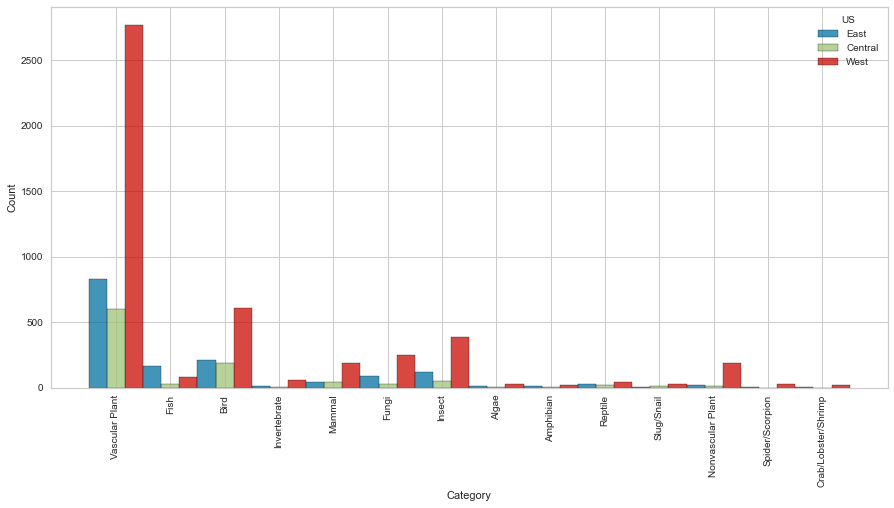

In [35]:
g1 = sns.histplot(data = sp_clean, x = "Category", hue = "US", multiple = "dodge")
plt.setp(g1.get_xticklabels(), rotation=90)

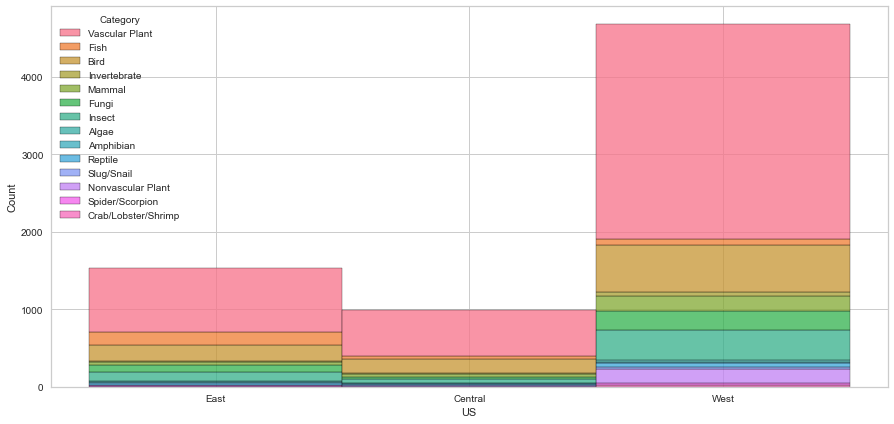

In [33]:
g2 = sns.histplot(data = sp_clean, x = "US", hue = "Category", multiple = "stack")

In [23]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

In [24]:
sp_copy1 = sp_clean.copy()
sp_copy1["US"] = str(sp_copy1["US"])
sp_copy1["Category"] = str(sp_copy1["Category"])
sp_copy1["Nativeness"] = str(sp_copy1["Nativeness"])
sp_copy1["Abundance"] = str(sp_copy1["Abundance"])

features1 = ["US", "Category", "Nativeness", "Abundance"]
set1 = sp_copy1[["US", "Category", "Nativeness", "Abundance"]]
val1 = set1.values

In [25]:
visualizer = Rank2D(features=features1, algorithm='pearson')
visualizer.fit(val1)                # Fit the data to the visualizer
visualizer.transform(val1)             # Transform the data
visualizer.show(outpath="d://pcoords3.png") # Draw/show/poof the data
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

<AxesSubplot:xlabel='Conservation Status', ylabel='Abundance'>

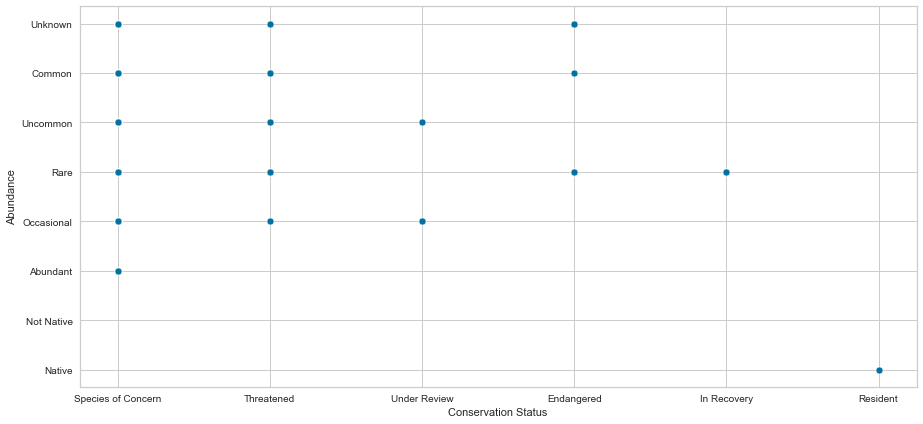

In [30]:
sns.scatterplot(x = "Conservation Status", y = "Abundance", data = sp_clean)